In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from pyvibdmc.simulation_utilities import *

In [2]:
def V_mat(V, x_grid):
    x = sp.Symbol('x')
    V_lambdified = sp.utilities.lambdify(x, V(x))
    return np.diag(V_lambdified(x_grid))

def T_mat(a, b):
    dim = int(np.abs(a-b)/DELTA_X+1)
    return np.fromfunction(np.vectorize(T_generator), (dim, dim))

def T_generator(i,j):
    c = (-1)**(i-j)/(2*DELTA_X**2*MU)
    return c*np.pi**2/3 if i==j else c*2/(i-j)**2

def DVR(V):
    x = sp.symbols('x', real=True)
    a,b = map(float, list(sp.solveset(V(x)-V_CUT, x, sp.S.Reals)))
    print(a,b)
    x_grid= np.linspace(min(a,b), max(a,b), num=int(np.abs(a-b)/DELTA_X+1), endpoint=True)
    print(x_grid.shape)
    
    V_matrix = V_mat(V, x_grid)
    T_matrix = T_mat(a,b)
    E,evecs = np.linalg.eigh(V_matrix+T_matrix)
    
    return E, evecs, x_grid
    

In [3]:
DELTA_X = 0.01
V_CUT = 100

def V_HO(x):
    return 0.5*x**2

def E_HO(n):
    return n+1/2

E_n, evecs, x_grid = DVR(V_HO)

-14.142135623730951 14.142135623730951
(2829,)


Analytic         DVR
[[0.5        0.50007552]
 [1.5        1.50022655]
 [2.5        2.50037759]
 [3.5        3.50052862]
 [4.5        4.50067965]
 [5.5        5.50083069]
 [6.5        6.50098172]
 [7.5        7.50113276]
 [8.5        8.50128379]
 [9.5        9.50143482]]


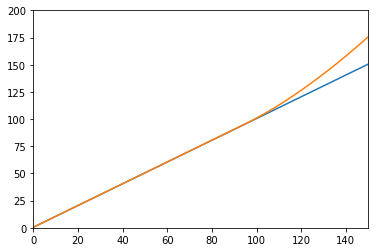

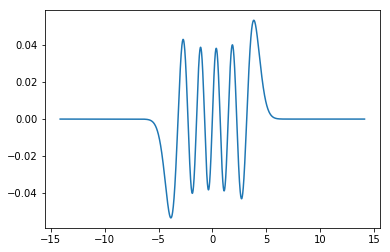

In [4]:
print('Analytic         DVR')
print(np.column_stack((E_HO(np.arange(0,10)), E_n[:10])))
plt.plot(np.arange(0, E_n.shape[0]),E_HO(np.arange(0,E_n.shape[0])))
plt.plot(np.arange(0, E_n.shape[0]), E_n)
plt.xlim((0,150))
plt.ylim((0,200))
plt.show()
plt.plot(x_grid, evecs[:,9])

In [112]:
def V_mat(V, x_grid):
    x = sp.Symbol('x')
    V_lambdified = sp.utilities.lambdify(x, V(x))
    V_matrix = np.diag(V_lambdified(x_grid))
    plt.matshow(V_matrix[:50,:50])
    return V_matrix

def T_mat(a, b):
    dim = int(np.abs(a-b)/DELTA_X+1)
    T_matrix = np.fromfunction(np.vectorize(T_generator), (dim, dim))
    plt.matshow(T_matrix[:50,:50])
    return T_matrix

def T_generator(i,j):
    c = (-1)**(i-j)/(2*DELTA_X**2*MU)
    return c*np.pi**2/3 if i==j else c*2/(i-j)**2

def DVR(V):
    x = sp.symbols('x', real=True)
    a,b = map(float, list(sp.solveset(V(x)-V_CUT, x, sp.S.Reals)))
    print(a,b)
    a -= 0.5
    x_grid= np.linspace(min(a,b), max(a,b), num=int(np.abs(a-b)/DELTA_X+1), endpoint=True)
    print(x_grid.shape)
    
    V_matrix = V_mat(V, x_grid)
    T_matrix = T_mat(a,b)
    E,evecs = np.linalg.eigh(V_matrix+T_matrix)
    
    return E, evecs, x_grid

In [113]:
DELTA_X = 0.001
V_CUT = 0.1

MU = Constants.reduced_mass('O-H', to_AU=True)
OMEGA = Constants.convert(3700, 'wavenumbers', to_AU=True)
CHI = 150/3700

D = OMEGA/(4*CHI)
ALPHA = np.sqrt((MU*OMEGA**2)/(2*D))

def V_MO(x):
    return D*(1-sp.exp(-ALPHA*x))**2

def E_MO(n):
    return OMEGA*(n+1/2)-OMEGA*CHI*(n+1/2)**2

-0.4446886067617555 2.5706994161780328
(3516,)


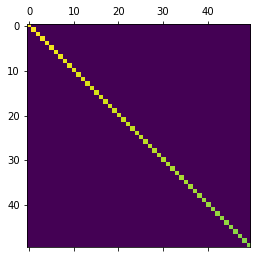

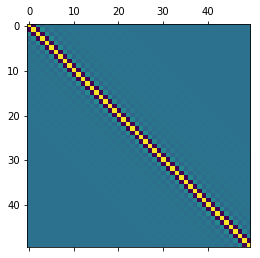

In [114]:
E_n, evecs, x_grid = DVR(V_MO)

Analytic         DVR
[[0.00825836 0.00825925]
 [0.0237499  0.02375235]
 [0.03787454 0.03787825]
 [0.05063228 0.05063694]
 [0.06202311 0.06202843]
 [0.07204705 0.07205272]
 [0.08070409 0.08070981]
 [0.08799423 0.08799982]
 [0.09391746 0.09393538]
 [0.0984738  0.09879119]]


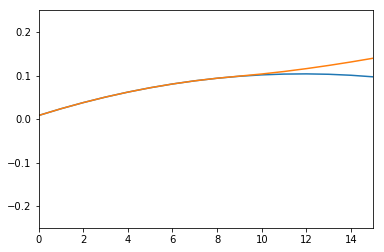

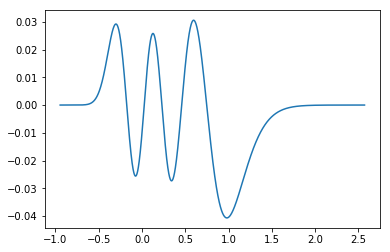

In [118]:
print('Analytic         DVR')
print(np.column_stack((E_MO(np.arange(0,10)), E_n[:10])))
plt.plot(np.arange(0, E_n.shape[0]),E_MO(np.arange(0,E_n.shape[0])))
plt.plot(np.arange(0, E_n.shape[0]), E_n)
plt.xlim((0,15))
plt.ylim((-0.25,0.25))
plt.show()
plt.plot(x_grid, evecs[:,5])

In [116]:
V_MO(100000000)

0.103960383332992

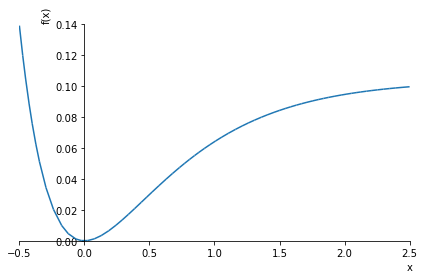

In [117]:
sp.plotting.plot(V_MO(sp.symbols('x')), (sp.symbols('x'), -0.5,2.5))